## Optimizing the Rosenbrock-Function

In this exercise we optimize over the rosenbrock function using different levels of information about the derivative

- Implement the Rosenbrock function, its exact gradient and its exact Hessian w.r.t to the standard Euclidean scalar product.
- Solve the optimization problem $\min f(x)$ using the function \verb|minimize| of the module \verb|scipy.optimize| with starting values $x_0=(0,0)$ and $x_0 = (0.99, 0.99)$. 
    - without any other parameters except from $f$ and $x_0$.
    - using of the parameter `jac`.
    - using of the parameters `jac` and `hess` and `method="Newton-CG"`.
Print the solution of \verb|minimize| into your iPython-Notebook.

In [1]:
import scipy as sp
import scipy.optimize as opt
import numpy as np
from numdrv_test import test
import matplotlib.pyplot as plt

b=100
        
def f(z):
    """Rosenbrock function
    Parameters:
        z: nd_array, 2-D input value
    Returns:
        float"""
    x,y = z
    return (1-x)**2 + b*(y- x**2)**2

def df(z):
    """First derivative of Rosenbrock function
    Parameters:
        z: nd_array, 2-D input value
    Returns:
        nd_array, 2D vector of partial derivatives"""
    x,y = z  ### initially z at (0, 0)
    dx = -2*(1-x) - 4*b*(y-x**2)*x
    dy = 2*b*(y- x**2)
    return np.array([dx, dy])

def Hessf(z):
    """Second derivative of Rosenbrock function
    Parameters:
        z: nd_array, 2-D input value
    Returns:
        nd_array of shape (2,2), matrix containing second derivatives"""
    x,y = z
    dxx = 2 - 4*b*(y-3*x**2)
    dyx = -4*b*x
    dyy = 2*b
    return np.array([[dxx, dyx], [dyx, dyy]])

A **callback function** allows to execute code after each iteration of the optimizer. They helps us to access information which is hidden otherwise. In order to save the information however a function is not suitable, because functions cannot remember any data of past executions (of course, because its a function). To this end we can use a callable class. A class can contain an attribute `self.xk` which saves information about the iterates, and can also be callable if we define the `()`-operator by adding the magical method `__call__()`.

In [2]:
class CallBack:
    """Call back
    
    Collects information aboute the iterates xk in a list 
    self.xk.
    """
    def __init__(self):
        # The Class constructor is executed when 
        # we create an new isntance by obj = CallBack().
        # It takes no arguments.
        self.xk=[]
        
    def __call__(self, xk):
        # The means an object obj = CallBack
        # can be executed like a function by obj().
        self.xk.append(xk.copy())
        return False
    def getxk(self):
        return np.array(self.xk)
    
    def plot(self, xmin=-1.5, xmax=1.5):
        Xk = np.array(self.xk)
        l = np.arange(xmin,xmax,.01)
        X,Y = np.meshgrid(l,l)
        XY = np.vstack([X.ravel(),Y.ravel()]).T
        Z = np.array([f(xy) for xy in XY])
        Z=Z.reshape(X.shape)
        plt.contourf(X,Y,Z,levels=20)
        plt.contour(X,Y,Z,levels=10)
        zk = np.array([f(xk) for xk in self.xk])
        plt.scatter(Xk[:,0], Xk[:,1], s=15)
        plt.plot(Xk[:,0], Xk[:,1], alpha=.6)
        plt.scatter(1,1,c="r")
        plt.show()

      fun: 2.8439854262904333e-11
 hess_inv: array([[0.49482461, 0.98957648],
       [0.98957648, 1.98394242]])
      jac: array([ 3.98678486e-06, -2.84414614e-06])
  message: 'Optimization terminated successfully.'
     nfev: 96
      nit: 19
     njev: 24
   status: 0
  success: True
        x: array([0.99999467, 0.99998932])


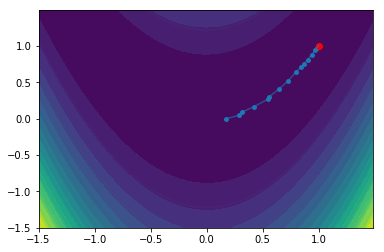

In [3]:
callback_f = CallBack()
print(opt.minimize(f, (0,0), callback=callback_f))
callback_f.plot()

      fun: 7.717288359756836e-13
 hess_inv: array([[0.49480256, 0.98953879],
       [0.98953879, 1.98387918]])
      jac: array([ 3.92841205e-06, -2.83120876e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 19
     njev: 24
   status: 0
  success: True
        x: array([0.99999913, 0.99999825])


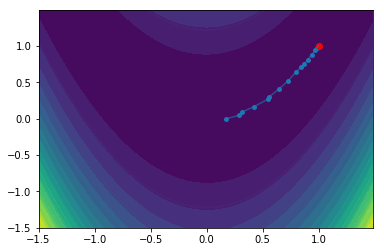

In [4]:
callback_df = CallBack()
print(opt.minimize(f, (0,0), jac=df, callback=callback_df))
callback_df.plot()

     fun: 1.4946277209407569e-09
     jac: array([ 0.01269975, -0.00637599])
 message: 'Optimization terminated successfully.'
    nfev: 53
    nhev: 33
     nit: 33
    njev: 85
  status: 0
 success: True
       x: array([0.99996137, 0.99992259])


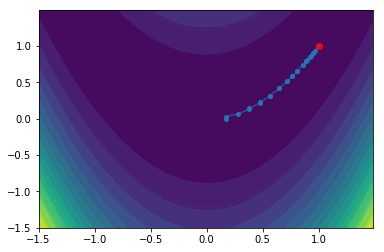

In [5]:
callback_h = CallBack()
print(opt.minimize(f, (0,0), jac=df, hess=Hessf, method="Newton-CG", callback=callback_h))
callback_h.plot()

The callback function also allows us to monitor the convergence rate.

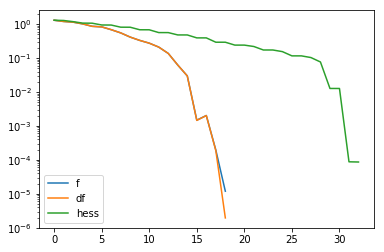

In [6]:
norm = lambda data: np.linalg.norm(data, axis=1)

# Subtract optimal point (1,1) from all iterates x_k
err_fxk = callback_f.getxk() - 1.
err_dfxk = callback_df.getxk() - 1.
err_hxk = callback_h.getxk() - 1.

# Compute errors
err_fxk = norm(err_fxk)
err_dfxk = norm(err_dfxk)
err_hxk = norm(err_hxk)

plt.yscale("log")
plt.plot(err_fxk, label="f")
plt.plot(err_dfxk, label="df")
plt.plot(err_hxk, label="hess")
plt.legend()
plt.show()

      fun: 1.991525438849289e-11
 hess_inv: array([[0.5057776 , 1.01127204],
       [1.01127204, 2.0269894 ]])
      jac: array([ 3.33982513e-07, -1.51122670e-07])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 6
     njev: 8
   status: 0
  success: True
        x: array([0.99999554, 0.99999107])


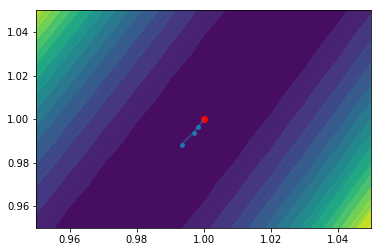

In [7]:
callback_f99 = CallBack()
print(opt.minimize(f, (0.99,0.99), callback=callback_f99))
callback_f99.plot(xmin=0.95, xmax=1.05)

      fun: 3.0892480424462744e-16
 hess_inv: array([[0.50577237, 1.01126656],
       [1.01126656, 2.02698836]])
      jac: array([ 3.33993598e-07, -1.51127777e-07])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 6
     njev: 8
   status: 0
  success: True
        x: array([1.00000002, 1.00000003])


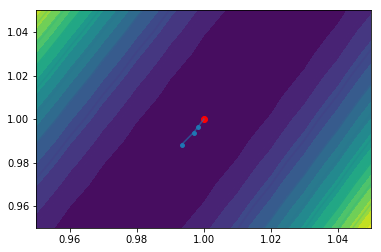

In [8]:
callback_df99 = CallBack()
print(opt.minimize(f, (0.99,0.99), jac=df, callback=callback_df99))
callback_df99.plot(xmin=0.95, xmax=1.05)

     fun: 1.3786541428112737e-16
     jac: array([ 3.90471890e-06, -1.96019321e-06])
 message: 'Optimization terminated successfully.'
    nfev: 6
    nhev: 5
     nit: 5
    njev: 10
  status: 0
 success: True
       x: array([0.99999999, 0.99999998])


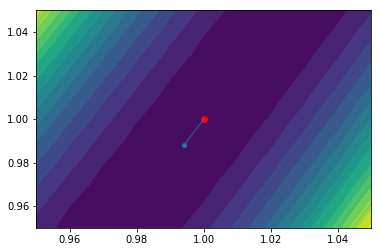

In [9]:
callback_h99 = CallBack()
print(opt.minimize(f, (.99,.99), jac=df, hess=Hessf, method="Newton-CG", callback=callback_h99))
callback_h99.plot(xmin=0.95, xmax=1.05)

NameError: name 'fxk' is not defined

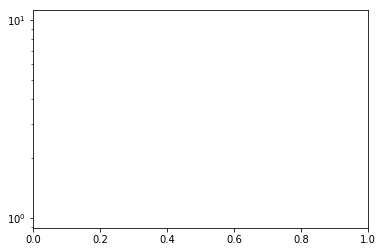

In [10]:
norm = lambda data: np.linalg.norm(data, axis=1)

# Subtract optimal point (1,1) from all iterates x_k
err_fxk = callback_f.getxk() - 1.
err_dfxk = callback_df.getxk() - 1.
err_hxk = callback_h.getxk() - 1.

# Compute errors
err_fxk = norm(err_fxk)
err_dfxk = norm(err_dfxk)
err_hxk = norm(err_hxk)

plt.yscale("log")
plt.plot(err_fxk, label="f")
plt.plot(err_dfxk, label="df")
plt.plot(err_hxk, label="hess")
plt.legend()
plt.show()